In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torchsummary import summary

In [4]:
trainingDataSet = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
testingDataSet = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))
batch_sizes = [64,1024]
train1 = torch.utils.data.DataLoader(trainingDataSet, batch_size=batch_sizes[0], shuffle=True)
test1 = torch.utils.data.DataLoader(testingDataSet, batch_size=batch_sizes[0], shuffle=True)
train2 = torch.utils.data.DataLoader(trainingDataSet, batch_size=batch_sizes[1], shuffle=True)
test2 = torch.utils.data.DataLoader(testingDataSet, batch_size=batch_sizes[1], shuffle=True)

def calcParams(model):
    val = sum(params.numel() for params in model.parameters() if params.requires_grad)
    return val

100%|██████████| 9912422/9912422 [00:00<00:00, 88067901.14it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 69023187.36it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 25429530.48it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13578423.93it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [6]:
class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,30)
        self.fc2 = nn.Linear(30, 50)
        self.out = nn.Linear(50, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.out(val)
        return val

In [7]:
model1=Model1()
model1params=calcParams(model1)
print(model1params)


25610


In [24]:
lossFunc1 = nn.CrossEntropyLoss()
opt1 = torch.optim.Adam(model1.parameters(), lr=0.001)

In [25]:
epochs = 10
trainCorrectMod1 = []
testCorrectMod1 = []
trainLossesMod1=[]
testLossesMod1=[]
trainCostList = []
trainAccList = []
testCostList = []
testAccList = []
for i in range(epochs):
    trainCorr = 0
    testCorr = 0

    for batch, (XTrain, yTrain) in enumerate(train1):

        y_pred = model1(XTrain.view(-1,784))
        trnLoss = lossFunc1(y_pred, yTrain)
        predicted = torch.max(y_pred.data, 1)[1]
        batchCorr = (predicted == yTrain).sum()
        trainCorr += batchCorr

        opt1.zero_grad()
        trnLoss.backward()
        opt1.step()

    trainLossesMod1.append(trnLoss)
    trainCorrectMod1.append(trainCorr)

    with torch.no_grad():
        for batch, (XTest, yTest) in enumerate(test1):

            y_val = model1(XTest.view(-1,784))
            predicted = torch.max(y_val.data, 1)[1]
            testCorr += (predicted == yTest).sum()

    testLoss = lossFunc1(y_val, yTest)
    testLossesMod1.append(testLoss)
    testCorrectMod1.append(testCorr)

for i in range(len(trainLossesMod1)):
     trainCostList.append(trainLossesMod1[i].detach().numpy())
for i in range(len(testLossesMod1)):
     testCostList.append(testLossesMod1[i].detach().numpy())
for i in range(len(trainCorrectMod1)):
     trainAccList.append(trainCorrectMod1[i].detach().numpy()/600)
for i in range(len(testCorrectMod1)):
     testAccList.append(testCorrectMod1[i].detach().numpy()/100)


In [26]:
#Model 2 with batch size 1024
class Model2(nn.Module):
    def __init__(self, in_features=784, h2=30, h3=50, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(784,30)
        self.fc2 = nn.Linear(30, 50)
        self.out = nn.Linear(50, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.out(val)
        return val

In [34]:
model2=Model2()
model2params=calcParams(model2)
print(model2params)
summary(model2,(28*28,))

25610
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 30]          23,550
            Linear-2                   [-1, 50]           1,550
            Linear-3                   [-1, 10]             510
Total params: 25,610
Trainable params: 25,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.10
Estimated Total Size (MB): 0.10
----------------------------------------------------------------


In [28]:
lossFunc2 = nn.CrossEntropyLoss()
opt2 = torch.optim.Adam(model2.parameters(), lr=0.001)
epochs = 10
trainLossesMod2=[]
testLossesMod2=[]
trainCorrectMod2 = []
testCorrectMod2 = []
for i in range(epochs):
    trainCorr = 0
    testCorr = 0

    for batch, (XTrain, yTrain) in enumerate(train2):

        y_pred = model2(XTrain.view(-1,784))
        loss = lossFunc2(y_pred, yTrain)
        predicted = torch.max(y_pred.data, 1)[1]
        batchCorr = (predicted == yTrain).sum()
        trainCorr += batchCorr
        opt2.zero_grad()
        loss.backward()
        opt2.step()

    trainLossesMod2.append(loss)
    trainCorrectMod2.append(trainCorr)


    with torch.no_grad():
        for batch, (XTest, yTest) in enumerate(test2):
            y_val = model2(XTest.view(-1,784))
            predicted = torch.max(y_val.data, 1)[1]
            testCorr += (predicted == yTest).sum()

    loss = lossFunc2(y_val, yTest)
    testLossesMod2.append(loss)
    testCorrectMod2.append(testCorr)

for i in range(len(trainLossesMod2)):
     trainCostList.append(trainLossesMod2[i].detach().numpy())
for i in range(len(testLossesMod2)):
     testCostList.append(testLossesMod2[i].detach().numpy())
for i in range(len(trainCorrectMod2)):
     trainAccList.append(trainCorrectMod2[i].detach().numpy()/600)
for i in range(len(testCorrectMod2)):
     testAccList.append(testCorrectMod2[i].detach().numpy()/100)


In [31]:
print(trainCostList)
alpa=np.linspace(-1.0, 2.0, 20)
thetaArr=[]
for i in range(len(alpa)):
    theta=(1-alpa[i])*model1params+alpa[i]*model2params
    thetaArr.append(theta)
print(alpa)

[array(0.00167522, dtype=float32), array(0.09720059, dtype=float32), array(0.06087074, dtype=float32), array(0.04261897, dtype=float32), array(0.03337918, dtype=float32), array(0.0063226, dtype=float32), array(0.03588654, dtype=float32), array(0.00121225, dtype=float32), array(0.00068181, dtype=float32), array(0.02499042, dtype=float32), array(0.7207524, dtype=float32), array(0.39765683, dtype=float32), array(0.32631811, dtype=float32), array(0.25338823, dtype=float32), array(0.25236812, dtype=float32), array(0.30315137, dtype=float32), array(0.24806209, dtype=float32), array(0.20881, dtype=float32), array(0.20443343, dtype=float32), array(0.19860785, dtype=float32)]
[-1.         -0.84210526 -0.68421053 -0.52631579 -0.36842105 -0.21052632
 -0.05263158  0.10526316  0.26315789  0.42105263  0.57894737  0.73684211
  0.89473684  1.05263158  1.21052632  1.36842105  1.52631579  1.68421053
  1.84210526  2.        ]


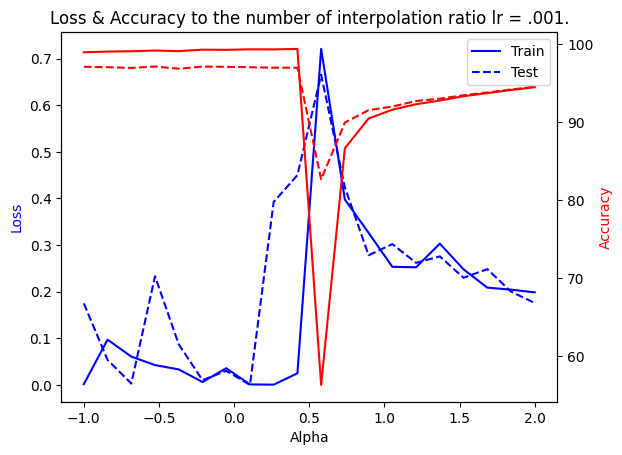

In [32]:
# Visulaize Loss and accuracy to the number of interpolation ratio with lr=0.001 for batch size of all models
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(alpa, trainCostList, 'b', label='Train')
ax1.plot(alpa, testCostList, 'b--', label='Test')
ax2.plot(alpa, trainAccList, 'r', label='accuracy')
ax2.plot(alpa, testAccList, 'r--', label='accuracy')
ax1.set_title('Loss & Accuracy to the number of interpolation ratio lr = .001.')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Loss', color='b')
ax2.set_ylabel('Accuracy', color='r')
ax1.legend()

In [35]:
model1=Model1()
lossFunc1 = nn.CrossEntropyLoss()
opt1 = torch.optim.Adam(model1.parameters(), lr=0.01)

In [36]:
epochs = 10
trainCorrectMod1 = []
testCorrectMod1 = []
trainLossesMod1=[]
testLossesMod1=[]

for i in range(epochs):
    trainCorr = 0
    testCorr = 0

    for batch, (XTrain, yTrain) in enumerate(train1):

        y_pred = model1(XTrain.view(-1,784))
        trnLoss = lossFunc1(y_pred, yTrain)

        predicted = torch.max(y_pred.data, 1)[1]
        batchCorr = (predicted == yTrain).sum()
        trainCorr += batchCorr
        opt1.zero_grad()
        trnLoss.backward()
        opt1.step()

    trainLossesMod1.append(trnLoss)
    trainCorrectMod1.append(trainCorr)

    with torch.no_grad():
        for batch, (XTest, yTest) in enumerate(test1):

            y_val = model1(XTest.view(-1,784))
            predicted = torch.max(y_val.data, 1)[1]
            testCorr += (predicted == yTest).sum()

    testLoss = lossFunc1(y_val, yTest)
    testLossesMod1.append(testLoss)
    testCorrectMod1.append(testCorr)



In [37]:
trainCostList = []
trainAccList = []
testCostList = []
testAccList = []
for i in range(len(trainLossesMod1)):
     trainCostList.append(trainLossesMod1[i].detach().numpy())
for i in range(len(testLossesMod1)):
     testCostList.append(testLossesMod1[i].detach().numpy())
for i in range(len(trainCorrectMod1)):
     trainAccList.append(trainCorrectMod1[i].detach().numpy()/600)
for i in range(len(testCorrectMod1)):
     testAccList.append(testCorrectMod1[i].detach().numpy()/100)

In [38]:
model2=Model2()
lossFunc2 = nn.CrossEntropyLoss()
opt2= torch.optim.Adam(model2.parameters(), lr=0.01)
epochs = 10
trainCorrectMod2 = []
testCorrectMod2 = []
trainLossesMod2=[]
testLossesMod2=[]

for i in range(epochs):
    trainCorr = 0
    testCorr = 0

    for b, (XTrain, yTrain) in enumerate(train2):

        y_pred = model2(XTrain.view(-1,784))
        trnLoss = lossFunc2(y_pred, yTrain)

        predicted = torch.max(y_pred.data, 1)[1]
        batchCorr = (predicted == yTrain).sum()
        trainCorr += batchCorr
        opt2.zero_grad()
        trnLoss.backward()
        opt2.step()

    trainLossesMod2.append(trnLoss)
    trainCorrectMod2.append(trainCorr)

    with torch.no_grad():
        for batch, (XTest, yTest) in enumerate(test2):

            y_val = model2(XTest.view(-1,784))

            predicted = torch.max(y_val.data, 1)[1]
            testCorr += (predicted == yTest).sum()
    testLoss = lossFunc2(y_val, yTest)
    testLossesMod2.append(testLoss)
    testCorrectMod2.append(testCorr)



In [39]:
for i in range(len(trainLossesMod2)):
     trainCostList.append(trainLossesMod2[i].detach().numpy())
for i in range(len(testLossesMod2)):
     testCostList.append(testLossesMod2[i].detach().numpy())
for i in range(len(trainCorrectMod2)):
     trainAccList.append(trainCorrectMod2[i].detach().numpy()/600)
for i in range(len(testCorrectMod2)):
     testAccList.append(testCorrectMod2[i].detach().numpy()/100)

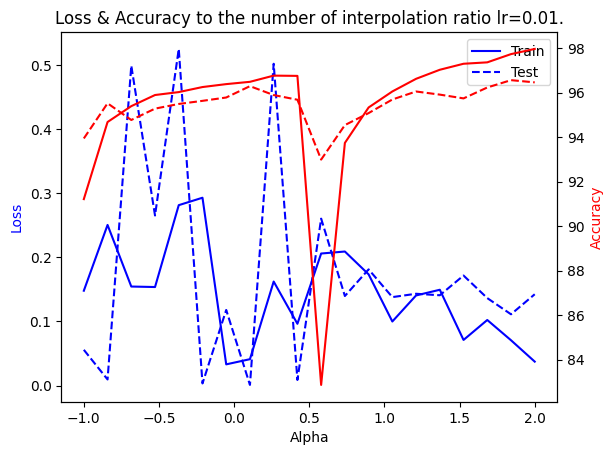

In [40]:
# Visulaize Loss and accuracy to the number of interpolation ratio with lr=0.001 for batch size of all models
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(alpa, trainCostList, 'b', label='Train')
ax1.plot(alpa, testCostList, 'b--', label='Test')
ax2.plot(alpa, trainAccList, 'r', label='accuracy')
ax2.plot(alpa, testAccList, 'r--', label='accuracy')
ax1.set_title('Loss & Accuracy to the number of interpolation ratio lr=0.01.')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Loss', color='b')
ax2.set_ylabel('Accuracy', color='r')
ax1.legend()